In [1]:
cd ..

/Users/bdboy/Desktop/Projects/Facial-Recognition


In [2]:
from siameseNet import SiameseNetwork
from dataset import FaceDataset,imshow,Config

In [3]:
import torch
import torchvision
import torch.nn as nn
from torch.autograd import Variable
import torchvision.datasets as dset
from torch.utils.data import DataLoader
import torchvision.transforms as transforms

In [4]:
net = SiameseNetwork()
net.load_state_dict(torch.load("./models/siameseNet19_04_2023_01_05_02.pth"))
net.eval()

SiameseNetwork(
  (cnn1): Sequential(
    (0): ReflectionPad2d((1, 1, 1, 1))
    (1): Conv2d(1, 4, kernel_size=(3, 3), stride=(1, 1))
    (2): ReLU(inplace=True)
    (3): BatchNorm2d(4, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (4): ReflectionPad2d((1, 1, 1, 1))
    (5): Conv2d(4, 8, kernel_size=(3, 3), stride=(1, 1))
    (6): ReLU(inplace=True)
    (7): BatchNorm2d(8, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (8): ReflectionPad2d((1, 1, 1, 1))
    (9): Conv2d(8, 8, kernel_size=(3, 3), stride=(1, 1))
    (10): ReLU(inplace=True)
    (11): BatchNorm2d(8, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (fc1): Sequential(
    (0): Linear(in_features=80000, out_features=500, bias=True)
    (1): ReLU(inplace=True)
    (2): Linear(in_features=500, out_features=500, bias=True)
    (3): ReLU(inplace=True)
    (4): Linear(in_features=500, out_features=5, bias=True)
  )
)

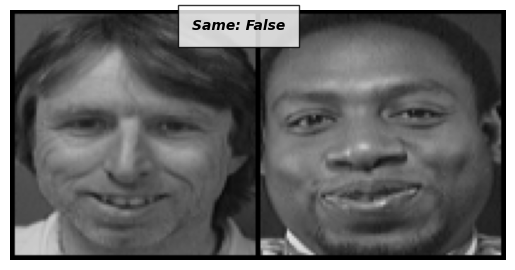

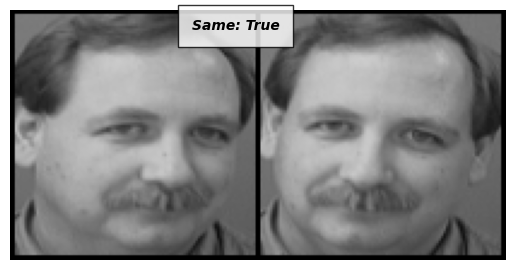

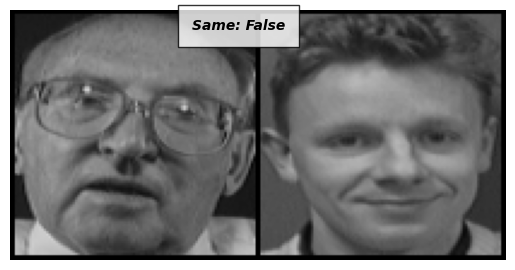

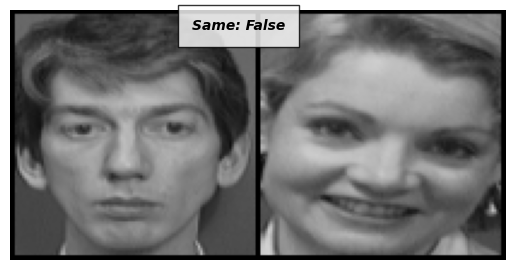

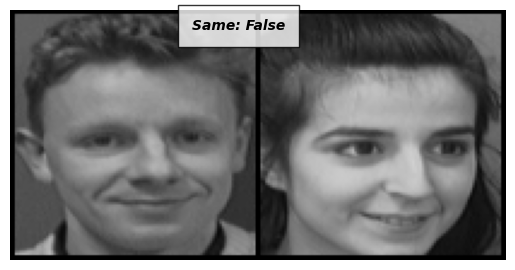

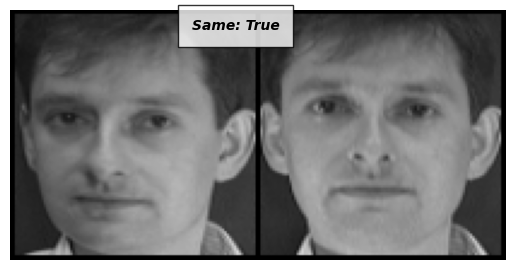

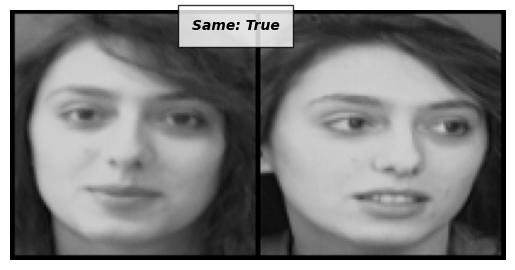

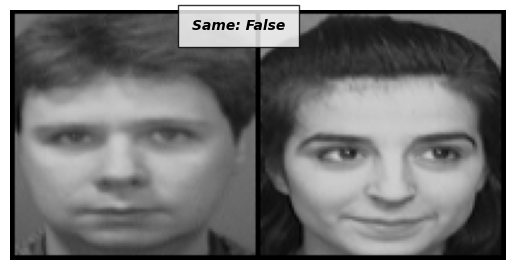

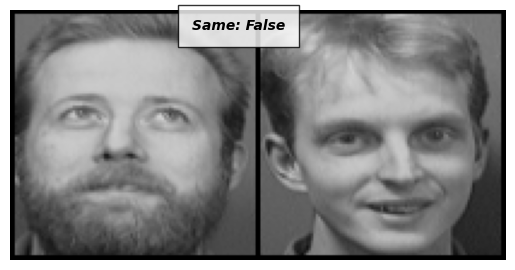

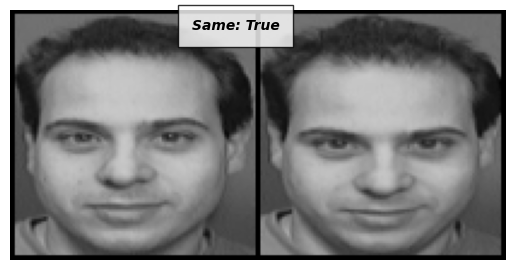

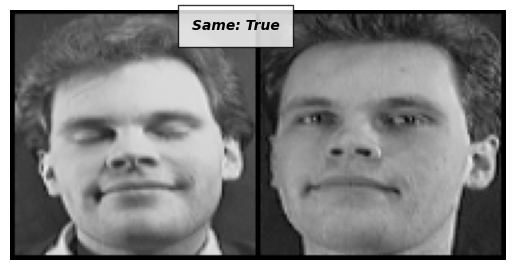

Accuracy:  99.7229916897507 %


In [5]:
folder_dataset_test = dset.ImageFolder(root=Config.training_dir)
TRANSFORM = transforms.Compose([transforms.Resize((100,100)),transforms.ToTensor()])
siamese_dataset_test = FaceDataset(face_dir=folder_dataset_test,transform=TRANSFORM)

test_dataloader = DataLoader(siamese_dataset_test,num_workers=0,batch_size=1,shuffle=True)
dataiter = iter(test_dataloader)

count = 0

for i in range(360):
    x0,x1,label = next(dataiter)
    concatenated = torch.cat((x0,x1),0)
    
    output1,output2 = net(Variable(x0),Variable(x1))
    euclidean_distance = nn.functional.pairwise_distance(output1, output2)
    same  = euclidean_distance.item() < 1.2
    
    if same and label.item() == 0:
        count += 1
    elif not same and label.item() == 1:
        count += 1

    if i%35==0:
        imshow(torchvision.utils.make_grid(concatenated),'Same: {}'.format(same))
    
print("Accuracy: ",(count/361)*100,"%")

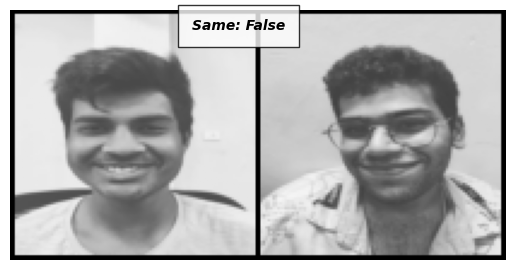

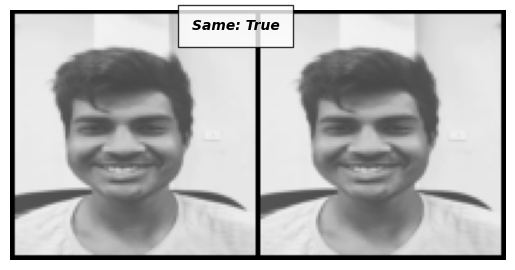

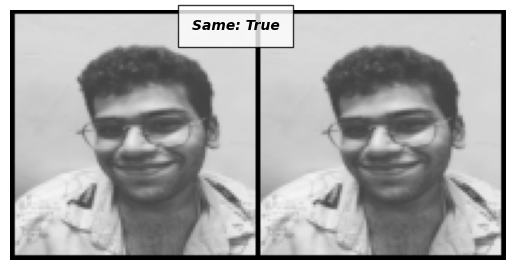

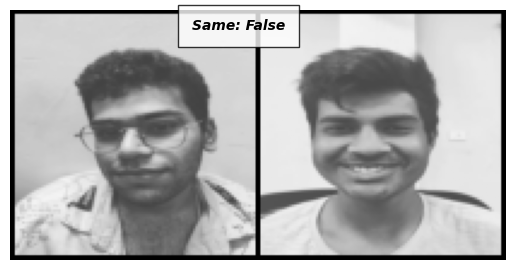

Accuracy:  100.0 %


In [6]:
folder_dataset_own = dset.ImageFolder(root=Config.own_dir)
TRANSFORM = transforms.Compose([transforms.Resize((100,100)),transforms.ToTensor()])
siamese_dataset_test = FaceDataset(face_dir=folder_dataset_own,transform=TRANSFORM)

test_dataloader = DataLoader(siamese_dataset_test,num_workers=0,batch_size=1,shuffle=True)
dataiter = iter(test_dataloader)

count = 0

for i in range(4):
    x0,x1,label = next(dataiter)
    concatenated = torch.cat((x0,x1),0)
    
    output1,output2 = net(Variable(x0),Variable(x1))
    euclidean_distance = nn.functional.pairwise_distance(output1, output2)
    same  = euclidean_distance.item() < 1.2
    
    if same and label.item() == 0:
        count += 1
    elif not same and label.item() == 1:
        count += 1

    imshow(torchvision.utils.make_grid(concatenated),'Same: {}'.format(same))
    
print("Accuracy: ",(count/4)*100,"%")